In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import seaborn as sns
import geopandas as gpd
import contextily as cx
from PIL import Image
from matplotlib.ticker import FormatStrFormatter

from PlotsForPaper_Functions import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [57]:
# import sys
# sys.path.append("ProcessModelResults/")
# from my_functions import *

In [58]:
methods_dict = {'Idealised': ['6h_sp_fl_0.1', '6h_sp_fl_0.2', '6h_sp_fl_0.3', '6h_sp_fl_0.4','6h_sp_c_0.5',
          '6h_sp_bl_0.6','6h_sp_bl_0.7','6h_sp_bl_0.8','6h_sp_bl_0.9'],
                'Observed':['6h_feh_singlepeak', '6h_c1','6h_c2','6h_c3','6h_c4', '6h_c5', '6h_c6','6h_c7',
             '6h_c8','6h_c9','6h_c10', '6h_c11', '6h_c12','6h_c13','6h_c14','6h_c15'], 
               'SinglePeak_Scaled':['6h_sp_+0%','6h_sp_+5%','6h_sp_+10%','6h_sp_+15%','6h_sp_+20%']}

## Plot catchments

In [59]:
# Catchment boundaries
lindyke_gdf = gpd.read_file('../../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/CatchmentLinDyke_exported.shp')
wykebeck_gdf = gpd.read_file('../../../FloodModelling/WykeBeckModels/Model_IdealisedProfiles/WykeBeckCatchment.shp')
# Watercourses (for whole country)
watercourses = gpd.read_file('../../../FloodModelling/ExtraData/Watercourses/WatercourseLink.shp')
# Boundary of whole city, for centering map
leeds_gdf =  gpd.read_file('../../../FloodModelling/ExtraData/LeedsBoundary/LeedsCatchments.shp')
# Profile lines
profileLines_LD = gpd.read_file('../../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/Features/Profile Lines.shp')
profileLines_WB = gpd.read_file('../../../FloodModelling/WykeBeckModels/Model_IdealisedProfiles/Features/Profile Lines.shp')

fig, ax = plt.subplots(figsize=(24, 10))
#plt.rcParams['figure.dpi']=1200 
leeds_gdf.plot(ax=ax, facecolor="none", linewidth=0.01, edgecolor ='black')
for catchment_gdf in [wykebeck_gdf, lindyke_gdf]:
    catchment_gdf.plot(ax=ax, facecolor="none", linewidth=1, edgecolor ='black')
    # get watercourses just for this catchment
    watercourses_clip = gpd.clip(watercourses, catchment_gdf)
    watercourses_clip.plot(ax=ax, linewidth=1)
    # add basemap
    ax.axis('off');

profileLines_LD.plot(ax=ax, linewidth=3, color='red') 
profileLines_WB.plot(ax=ax, linewidth=3, color='red') 
cx.add_basemap(ax, crs = catchment_gdf.crs.to_string(), url = cx.providers.OpenTopoMap, zoom=12)    
# fig.savefig("FigsForPaper/Catchments.png",bbox_inches='tight', dpi=1200)
fig.savefig("Figs/CatchmentLocations/Catchments_lowres.png",bbox_inches='tight')
plt.close()

In [5]:
# # Opens a image in RGB mode
# im = Image.open("FigsForPaper/Catchments.png")#.convert('L')
 
# #Image.crop(left, top, right, bottom)    
# left = 260
# top = 260
# right = 840
# bottom = 640
   
# im = im.crop((left, top, right, bottom)) 
# im.save("FigsForPaper/Catchments_test.png",bbox_inches='tight', dpi=1200)    

## Plot profiles (idealised and observed) - for Lin Dyke (but they will be v similar in both cases)

In [60]:
catchment_name = 'LinDyke'

In [61]:
feh_profile = pd.read_csv("../CreateSyntheticRainfallEvents/FEHProfiles/LinDyke/6hr_100yrRP/PreLossRemoval/6hr_100yrRP_6.01h_1mintimestep.csv".format(catchment_name))

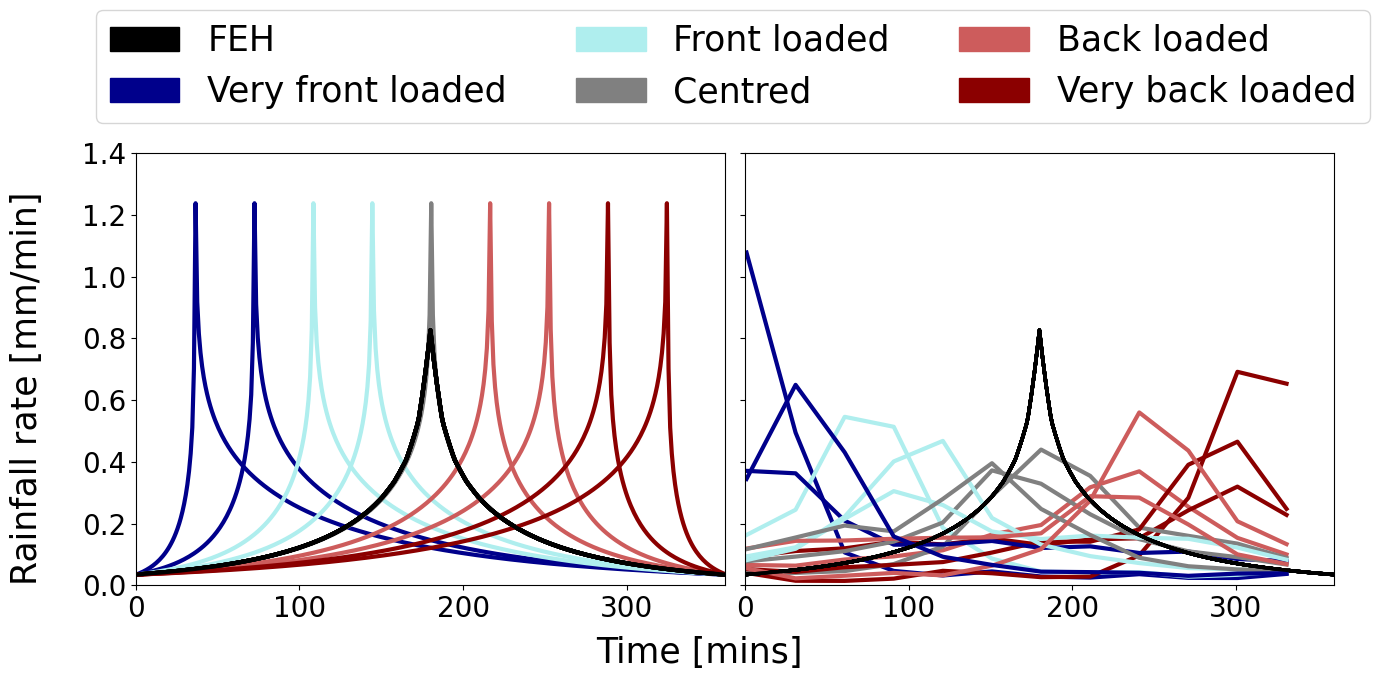

In [62]:
# Set up colours
colors_obs = ["darkblue","indianred","paleturquoise","darkred","darkred","grey","darkred","darkblue","grey","paleturquoise","paleturquoise","indianred","grey","indianred","darkblue"]
colors_idealised = ['darkblue']*2 + ['paleturquoise']*2 + ['grey']+ ['indianred']*2+['darkred']*2
colors_ls = {'Observed': colors_obs, 'Idealised': colors_idealised}

# set up figure instance
fig, axs = plt.subplots(ncols = 2, nrows = 1, figsize=(13,5), sharey=True)

for axes_number, method in enumerate(methods_dict['Idealised']):
    # Read in data
    idealised_profile = pd.read_csv("../CreateSyntheticRainfallEvents/IdealisedProfiles/{}/6hr_100yrRP/PreLossRemoval/{}.csv".format(catchment_name, method), names = ['Time', 'Rainfall'])
    axs[0].plot(np.array(range(361))+0.5,idealised_profile['Rainfall'], color=colors_idealised[axes_number], linewidth = 3)   
    # Add FEh profile
    axs[0].plot(range(0,361), feh_profile['100 year design rainfall - FEH 2013 model'][:361], color = 'black', linewidth=3,
            linestyle = 'solid') 
    axs[0].tick_params(axis='both', which='major', labelsize=20)
    #axs[0].set_ylim(-0.05,1.35)  
    
for cluster_number in range(1,16):
    # Read in pre and post loss removal data
    observed_profile = pd.read_csv('../CreateSyntheticRainfallEvents/ObservedProfiles/{}/6hr_100yrRP/PreLossRemoval/cluster{}.csv'.format(catchment_name, cluster_number), names = ['Time', 'Rainfall'])
    test = pd.DataFrame({'Rainfall':observed_profile['Rainfall'].unique(), 'Minute' : list(range(1,361,30))})
    axs[1].plot(test['Minute'],test['Rainfall'], color=colors_obs[cluster_number-1], linewidth = 3)   
    #axs[1].set_ylim(-0.05,1.35)    
    axs[1].tick_params(axis='both', which='major', labelsize=20)
    
    # loop through tickers and axes
    axs[1].plot(range(0,361), feh_profile['100 year design rainfall - FEH 2013 model'][:361], color = 'black', linewidth=2.5, linestyle = 'solid')

fig.text(0.5, -0.05, 'Time [mins]', ha='center', fontsize = 25)
fig.text(-0.03, 0.5, 'Rainfall rate [mm/min]', va='center', rotation='vertical', fontsize = 25)

fig.tight_layout() 

##############
# Create legend
##############
colors_leg = ['black', 'darkblue', 'paleturquoise','grey', 'indianred', 'darkred']
texts = ['FEH', 'Very front loaded','Front loaded','Centred', 'Back loaded', 'Very back loaded'] 
patches = [ mpatches.Patch(color=colors_leg[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
#plt.legend(handles=patches, bbox_to_anchor=(1.24, 0.5), loc='center', ncol=1, prop={'size': 15});
# plt.legend(handles=patches, bbox_to_anchor=(0.78, 0.79), loc='center', ncol=1, prop={'size': 13.5});
plt.legend(handles=patches, bbox_to_anchor=(-0.02, 1.20), loc='center', ncol=3, prop={'size': 25});

custom_xlim = (0, 360)
custom_ylim = (-0, 1.4)

# Setting the values for all axes.
plt.setp(axs, xlim=custom_xlim, ylim=custom_ylim)

##############
# Save figure
##############
fig.savefig("../CreateSyntheticRainfallEvents/Figs/Idealised_Observed_Profiles_{}.png".format(catchment_name),bbox_inches='tight')   

## Plot flooded extent

In [63]:
cluster_results_ip_ld= pd.read_csv("../ProcessModelResults/Outputs/Data/IdealisedProfiles/LinDyke/allclusters_summary.csv",
                                  keep_default_na=False)
cluster_results_ip_wb= pd.read_csv("../ProcessModelResults/Outputs/Data/IdealisedProfiles/WykeBeck/allclusters_summary.csv",
                                  keep_default_na=False)
cluster_results_op_ld= pd.read_csv("../ProcessModelResults/Outputs/Data/ObservedProfiles/LinDyke/allclusters_summary.csv",
                                  keep_default_na=False)
cluster_results_op_wb= pd.read_csv("../ProcessModelResults/Outputs/Data/ObservedProfiles/WykeBeck/allclusters_summary.csv",
                                  keep_default_na=False)

In [64]:
cluster_results_ip_ls = [cluster_results_ip_ld,cluster_results_ip_wb]
cluster_results_op_ls = [cluster_results_op_ld,cluster_results_op_wb]
catchment_name_ls = ['LinDyke','WykeBeck', 'LinDyke','WykeBeck']
cluster_results_ls_ls = [cluster_results_ip_ls, cluster_results_op_ls]

../ProcessModelResults/Outputs/Figs/CompareCatchments_Extent1Plot.PNG


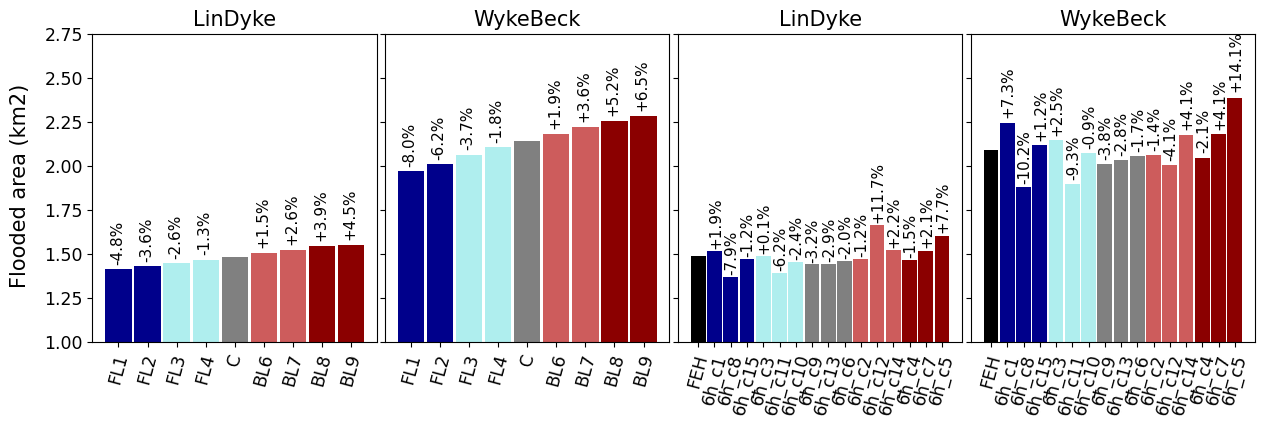

In [12]:
plot_flooded_extent_2catchments_2profilesets(cluster_results_ls_ls, '', 'Idealised','IP',ylim = 2.75, 
                                # One controls left 2, second controls right 2
                                percent_adjustments = [1.3,1.4], 
                                # Left = idealised, LD, right = LD, observed
                                label_height_adjusters_x = [1.03, 1.02], 
                                # Left = idealised, WB, right = WB, observed
                                label_height_adjusters_y = [1.02,1.02], set_title=True)

../ProcessModelResults/Outputs/Figs/CompareCatchments_Extent1Plot_Urban.PNG


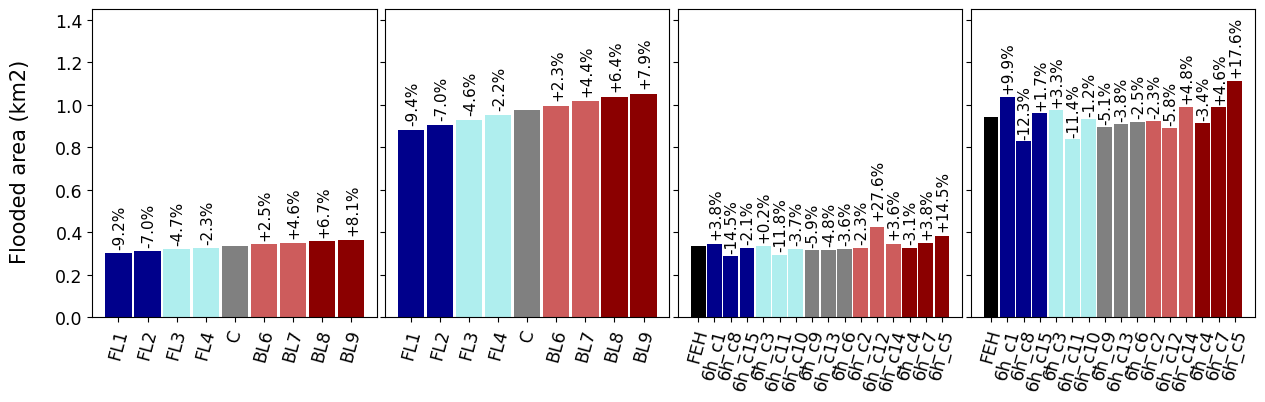

In [13]:
plot_flooded_extent_2catchments_2profilesets(cluster_results_ls_ls, 'Urban', 'Idealised','IP',ylim = 1.45, 
                                # One controls left 2, second controls right 2
                                percent_adjustments = [1.2,1.4], 
                                # Left = idealised, LD, right = LD, observed
                                label_height_adjusters_x = [1.1, 1.1], 
                                # Left = idealised, WB, right = WB, observed
                                label_height_adjusters_y = [1.04,1.03])

../ProcessModelResults/Outputs/Figs/CompareCatchments_Extent1Plot_Notwater.PNG


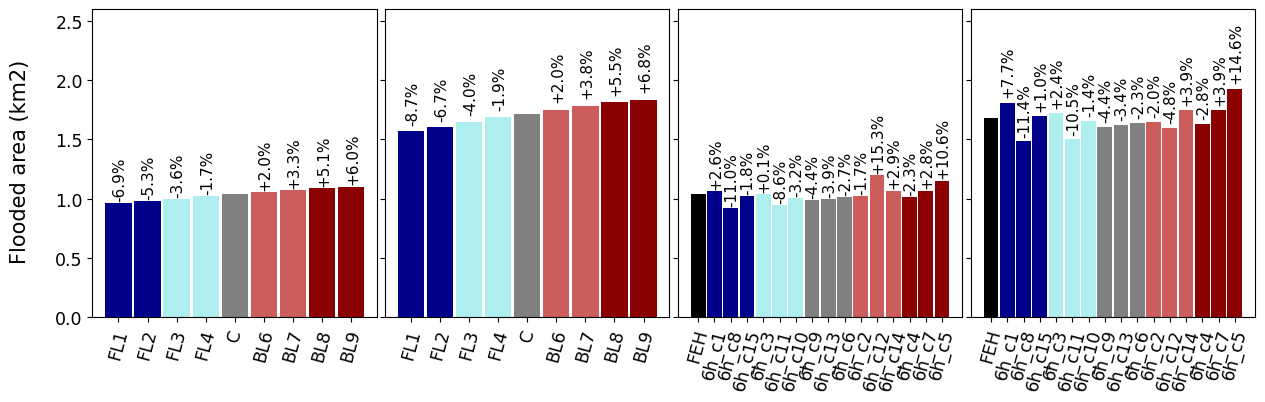

In [14]:
plot_flooded_extent_2catchments_2profilesets(cluster_results_ls_ls, 'Notwater', 'Idealised','IP',ylim = 2.6, 
                                # One controls left 2, second controls right 2
                                percent_adjustments = [1.2,1.4], 
                                # Left = idealised, LD, right = LD, observed
                                label_height_adjusters_x = [1.04, 1.04], 
                                # Left = idealised, WB, right = WB, observed
                                label_height_adjusters_y = [1.05,1.04])

## Plot Flood Severity

In [15]:
individual_cell_values_ip_ld= pd.read_csv("../ProcessModelResults/Outputs/Data/IdealisedProfiles/LinDyke/individual_cell_values.csv")
individual_cell_values_ip_wb=pd.read_csv("../ProcessModelResults/Outputs/Data/IdealisedProfiles/WykeBeck/individual_cell_values.csv")
individual_cell_values_op_ld= pd.read_csv("../ProcessModelResults/Outputs/Data/ObservedProfiles/LinDyke/individual_cell_values.csv")
individual_cell_values_op_wb= pd.read_csv("../ProcessModelResults/Outputs/Data/ObservedProfiles/WykeBeck/individual_cell_values.csv")
individual_cell_values_sps_ld= pd.read_csv("../ProcessModelResults/Outputs/Data/SinglePeak_ScaledProfiles/LinDyke/individual_cell_values.csv")
individual_cell_values_sps_wb= pd.read_csv("../ProcessModelResults/Outputs/Data/SinglePeak_ScaledProfiles/WykeBeck/individual_cell_values.csv")

In [156]:
individual_cell_values_ip = [individual_cell_values_ip_ld,individual_cell_values_ip_wb]
individual_cell_values_op = [individual_cell_values_op_ld,individual_cell_values_op_wb]
individual_cell_values_sps = [individual_cell_values_sps_ld,individual_cell_values_sps_wb]

individual_cell_values_ip_dict = {'LinDyke': individual_cell_values_ip_ld,
                             'WykeBeck': individual_cell_values_ip_wb}

### Plot boxplots

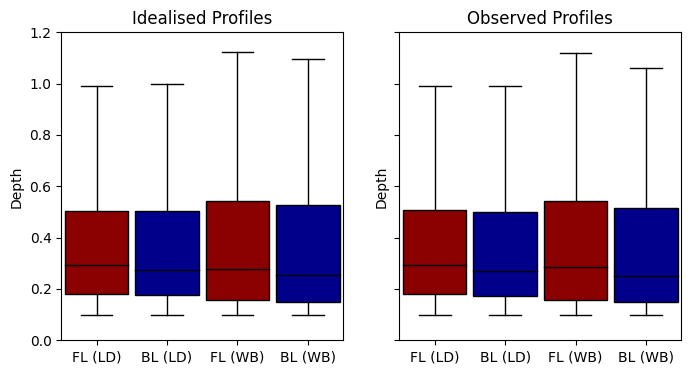

In [17]:
fig, axs = plt.subplots(1, 2,figsize=(8,4), sharey=True)    
boxplot(fig, individual_cell_values_ip, "6h_sp_fl_0.1", "6h_sp_bl_0.9",  'Depth', axs[0], 'Idealised Profiles', False)
boxplot(fig, individual_cell_values_op, "6h_c8", "6h_c5", 'Depth', axs[1], 'Observed Profiles', False)

In [18]:
# fig, axs = plt.subplots(1, 2,figsize=(8,4), sharey=True)    
# boxplot(individual_cell_values_ip, "6h_sp_fl_0.1", "6h_sp_bl_0.9",  'Velocity', axs[0], 'Idealised Profiles', False)
# boxplot(individual_cell_values_op, "6h_c8", "6h_c5", 'Velocity', axs[1], 'Observed Profiles', False)

### Plot histograms

In [19]:
### Check the values above which we are plotting

<Axes: >

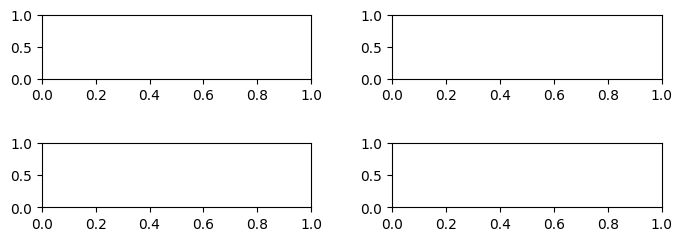

In [148]:
fig, axs = plt.subplots(ncols= 2, nrows=2, sharey=False,figsize = (8,2.5), gridspec_kw={'hspace':1, 'wspace': 0.3})
axs.flatten()[1]

In [140]:
def plot_histogram_weighted (individual_cell_values_ls, variable_name, profiles_name, profiles_name_short, smallest_method,
                    largest_method, title = True):
    
    catchments = ['LinDyke', 'WykeBeck']
    
    # Define bins
    if variable_name == 'Depth':
        bins = [0.1,0.3,0.6,1.2, 3]
        bins
    elif variable_name =='Velocity':
        bins =[0, 0.25, 0.5, 1, 2, 3]
    if variable_name == 'Depth':
        b = [f'{i}-{j}m' for i, j in zip(np.round(bins,1)[:], np.round(bins,1)[1:])] 
        b = [f'{i}-{j}m' for i, j in zip(bins[:], bins[1:])] 
        b = b + ['>3m']
    else:
        b = [f'{i}-{j}m/s' for i, j in zip(np.round(bins,1)[:], np.round(bins,1)[1:])] 
        b = b + ['>3m/s']
    
    # Set up figure
    fig, axs = plt.subplots(ncols= 2, nrows=1, sharey=False,figsize = (8,2.5), gridspec_kw={'hspace':1, 'wspace': 0.3})
    dfs=[]
    
    ##############################
    # Plot number of flooded cells
    ##############################
    # Number relates to if it's data for ld or wb
    for number, ax in enumerate(axs.flatten()):
        # Get data
        individual_cell_values =  individual_cell_values_ls[number]
        
        # Set weights differently to account for different cell sizes 
        if catchments[number] =='WykeBeck':
            weight = 4 * 0.000001 
        elif catchments[number] == 'LinDyke':
            weight = 0.000001 
        
        # Get the 2 most extreme scenario results separately
        extremes = individual_cell_values.loc[individual_cell_values['short_id'].isin([smallest_method, largest_method])].copy()
        # Get so the most/least extreme appear in plots with the colours in same order
        if profiles_name =='SinglePeak_Scaled':
            extremes.sort_values(by=['short_id'],ascending =True, inplace=True)
        else:
            extremes.sort_values(by=['short_id'],ascending=True, inplace=True)
        
        # Plot
        ls_values = sns.histplot(ax=axs[number], data=extremes, x=variable_name, hue='short_id',stat='count',
                                 element = 'step', weights=weight,linewidth=2, fill =False,log_scale=False,
                                 bins=bins, palette = ['darkred','darkblue']).get_lines()
        ax.set_ylabel('Area (km2)')
        
        # Set title
        if title == True:
            axs[number].set_title(catchments[number],fontsize=15)
          
        #### Get change percentages
        most_extreme_ls = []
        least_extreme_ls = []
        diff_ls=[]
        for num in range(0,len(ls_values[1].get_data()[1][:-1])):
            least_extreme = ls_values[0].get_data()[1][:-1][num]
            least_extreme_ls.append(round(least_extreme,2))
            most_extreme = ls_values[1].get_data()[1][:-1][num]
            most_extreme_ls.append(round(most_extreme,2))
            diff=most_extreme-least_extreme
            diff_ls.append(round(diff,3))
            
        # Add ones not in the histogram    
        largest_method_values = individual_cell_values.loc[individual_cell_values['short_id'].isin([largest_method])].copy()
        smallest_method_values = individual_cell_values.loc[individual_cell_values['short_id'].isin([smallest_method])].copy()
        
        if variable_name == 'Depth':
            least_extreme_abovehist =len(smallest_method_values[smallest_method_values['Depth']>bins[-1]])
            least_extreme_ls.append(round((least_extreme_abovehist/1000000),2))
            most_extreme_abovehist = len(largest_method_values[largest_method_values['Depth']>bins[-1]])
            most_extreme_ls.append(round((most_extreme_abovehist/1000000),2))
        else:
            least_extreme_abovehist =len(smallest_method_values[smallest_method_values['Velocity']>bins[-1]])
            least_extreme_ls.append(round((least_extreme_abovehist/1000000),2))
            most_extreme_abovehist = len(largest_method_values[largest_method_values['Velocity']>bins[-1]])      
            most_extreme_ls.append(round((most_extreme_abovehist/1000000),2))
        # Difference
        diff_abovehist = most_extreme_abovehist - least_extreme_abovehist
        diff_ls.append(round((diff_abovehist/1000000),4))
        
        # Add column in dataframe
        df = pd.DataFrame({'label':b, 'LeastExtreme': least_extreme_ls, 'MostExtreme':most_extreme_ls, 'Difference': diff_ls})
        dfs.append(df)
    return dfs


In [189]:
def plot_histogram_weighted (individual_cell_values_ip_dict, profiles_name, profiles_name_short, smallest_method,
                    largest_method, title = True):
    
    catchments = ['LinDyke', 'WykeBeck', 'LinDyke', 'WykeBeck']
    variables = ['Depth', 'Depth', 'Velocity', 'Velocity']
    
    # Set up figure
    fig, axs = plt.subplots(ncols= 2, nrows=2, sharey=False,figsize =(11,5), gridspec_kw={'hspace':0.4, 'wspace': 0.3})
    dfs=[]
    
    for ax_number, ax in enumerate(axs.flatten()):
        variable_name = variables[ax_number]
        catchment_name = catchments[ax_number]
        
        # Get data
        individual_cell_values =  individual_cell_values_ip_dict[catchment_name]

        # Define bins
        if variable_name == 'Depth':
            bins = [0.1,0.3,0.6,1.2, 3]
            b = [f'{i}-{j}m' for i, j in zip(np.round(bins,1)[:], np.round(bins,1)[1:])] 
            b = [f'{i}-{j}m' for i, j in zip(bins[:], bins[1:])] 
            b = b + ['>3m']
            
        elif variable_name =='Velocity':
            bins =[0, 0.25, 0.5, 1, 2, 3]
            b = [f'{i}-{j}m/s' for i, j in zip(np.round(bins,1)[:], np.round(bins,1)[1:])] 
            b = b + ['>3m/s']

        # Set weights differently to account for different cell sizes 
        if catchment_name =='WykeBeck':
            weight = 4 * 0.000001 
        elif catchment_name == 'LinDyke':
            weight = 0.000001 

        # Get the 2 most extreme scenario results separately
        extremes = individual_cell_values.loc[individual_cell_values['short_id'].isin([smallest_method, largest_method])].copy()
        # Get so the most/least extreme appear in plots with the colours in same order
        if profiles_name =='SinglePeak_Scaled':
            extremes.sort_values(by=['short_id'],ascending =True, inplace=True)
        else:
            extremes.sort_values(by=['short_id'],ascending=True, inplace=True)

        # Plot
        ls_values = sns.histplot(ax=ax, data=extremes, x=variable_name, hue='short_id',stat='count',
                                 element = 'step', weights=weight,linewidth=2, fill =False,log_scale=False,
                                 bins=bins, palette = ['darkred','darkblue']).get_lines()
        ax.set_ylabel('Area (km2)')
        ax.set_xticks(bins)
        ax.tick_params(axis='x', rotation=55)
        
        # Set title
        if variable_name == 'Depth':
            ax.set_title(catchment_name, fontsize=15)

        #### Get change percentages
        most_extreme_ls = []
        least_extreme_ls = []
        diff_ls=[]
        for num in range(0,len(ls_values[1].get_data()[1][:-1])):
            least_extreme = ls_values[0].get_data()[1][:-1][num]
            least_extreme_ls.append(round(least_extreme,2))
            most_extreme = ls_values[1].get_data()[1][:-1][num]
            most_extreme_ls.append(round(most_extreme,2))
            diff=most_extreme-least_extreme
            diff_ls.append(round(diff,3))

        # Add ones not in the histogram    
        largest_method_values = individual_cell_values.loc[individual_cell_values['short_id'].isin([largest_method])].copy()
        smallest_method_values = individual_cell_values.loc[individual_cell_values['short_id'].isin([smallest_method])].copy()

        if variable_name == 'Depth':
            least_extreme_abovehist =len(smallest_method_values[smallest_method_values['Depth']>bins[-1]])
            least_extreme_ls.append(round((least_extreme_abovehist/1000000),2))
            most_extreme_abovehist = len(largest_method_values[largest_method_values['Depth']>bins[-1]])
            most_extreme_ls.append(round((most_extreme_abovehist/1000000),2))
        else:
            least_extreme_abovehist =len(smallest_method_values[smallest_method_values['Velocity']>bins[-1]])
            least_extreme_ls.append(round((least_extreme_abovehist/1000000),2))
            most_extreme_abovehist = len(largest_method_values[largest_method_values['Velocity']>bins[-1]])      
            most_extreme_ls.append(round((most_extreme_abovehist/1000000),2))
        # Difference
        diff_abovehist = most_extreme_abovehist - least_extreme_abovehist
        diff_ls.append(round((diff_abovehist/1000000),4))

        # Add column in dataframe
        df = pd.DataFrame({'label':b, 'LeastExtreme': least_extreme_ls, 'MostExtreme':most_extreme_ls, 'Difference': diff_ls})
        dfs.append(df)
    return dfs


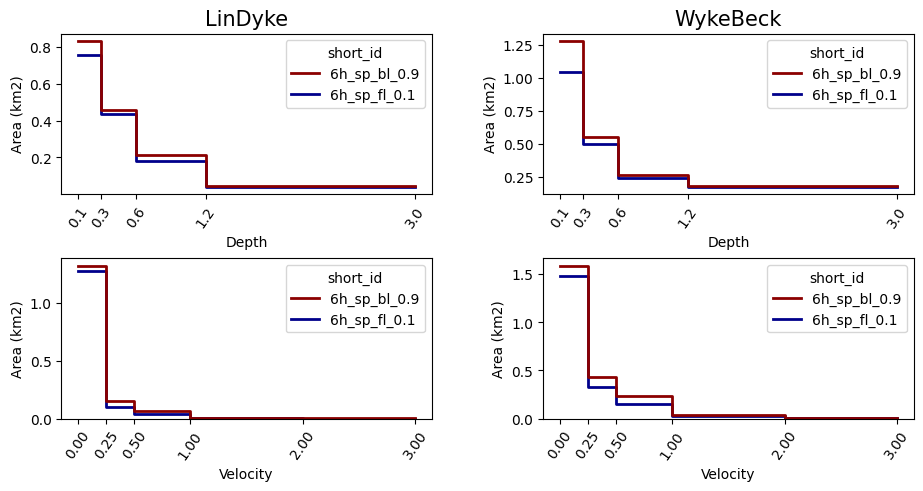

In [190]:
df_observed = plot_histogram_weighted(individual_cell_values_ip_dict, 'Observed','OP','6h_sp_fl_0.1', '6h_sp_bl_0.9'
                                            , title= True)

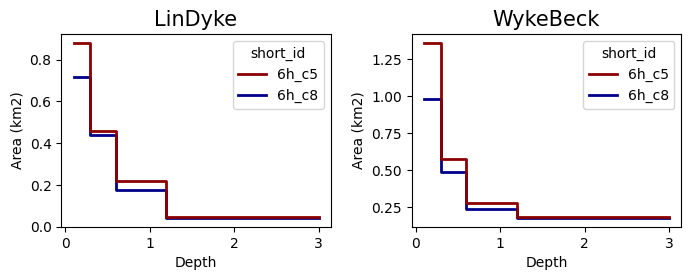

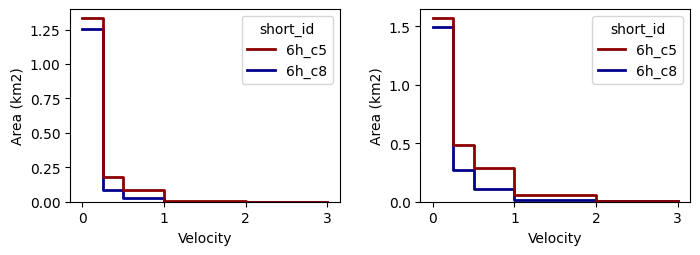

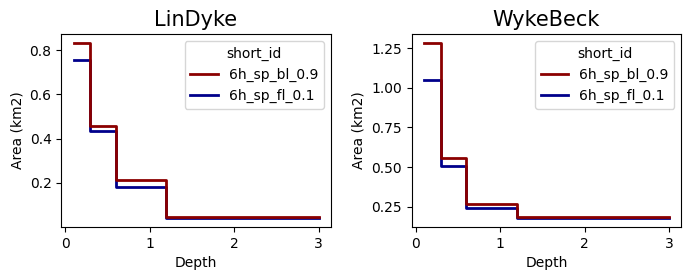

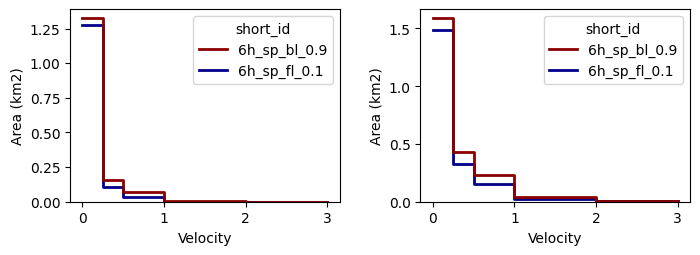

In [109]:
df_depth_observed = plot_histogram_weighted( individual_cell_values_op, 'Depth','Observed','OP','6h_c8', '6h_c5' , title= True)
df_velocity_observed = plot_histogram_weighted(individual_cell_values_op, 'Velocity','Observed','OP','6h_c8', '6h_c5' , title= False)
df_depth_idealised = plot_histogram_weighted(individual_cell_values_ip,  'Depth','Idealised', 'IP', '6h_sp_fl_0.1', '6h_sp_bl_0.9' , title= True)
df_velocity_idealised = plot_histogram_weighted(individual_cell_values_ip,  'Velocity','Idealised', 'IP', '6h_sp_fl_0.1', '6h_sp_bl_0.9' , title= False)

### Hazard

In [ ]:
hazard_plot(individual_cell_values_ip, 'Idealised', 'IP', '6h_sp_fl_0.1', '6h_sp_bl_0.9' )

In [ ]:
hazard_plot(individual_cell_values_op, 'Observed', 'OP','6h_c8', '6h_c5')

## Flow timeseries

In [ ]:
profile_line_names_ld = ['KippaxBeck', 'SheffieldBeck', 'LinDyke']
profile_line_names_wb = ['WykeBeck','WykeBeck_YorkRoad','WykeBeck_PontefractLane','OtherStream_AheadOfConfluence',
                     'CatchmentBottom']
profile_line_names_wb_forplot = ['WykeBeck','WB (YorkRd)','WB (PontefractLane)','OtherStream',
                     'CatchmentBottom']

profile_line_names={'LinDyke':profile_line_names_ld, 'WykeBeck': profile_line_names_wb}

In [ ]:
catchment_name = 'LinDyke'
catchment_name_short = "LD"
sharey= False

if sharey == True:
    sharey_identifier = "_sharey"
else:
    sharey_identifier = ''

# Make the plot
fig, axs = plt.subplots(nrows=2,ncols=len(profile_line_names[catchment_name]), figsize = (14,6), sharex=True, sharey=sharey)

# Additional loop:
for methods_num, methods_key in enumerate(["Idealised", 'Observed']):
    # Get
    colors = colors_ls[methods_key]
    model_directory = '../../FloodModelling/{}Models/Model_{}Profiles/'.format(catchment_name, methods_key)
    
    # Create the column names used in the Hec-Ras flow timeseries output
    methods = methods_dict[methods_key]
    methods=methods[1:]
    column_names = ['Time (03/08/2022)']
    for method in methods:
        column_names.append(method + ' [Post Processed] (CMS)')
    
    # Loop through each of the profile line location and create a subplot with the flow timeseries lines for each rainfall profile
    for axs_numb, profile_line in enumerate(profile_line_names[catchment_name]):
        # Read in data and reorder columns
        flow_timeseries = pd.read_csv(model_directory + "FlowLines/{}.csv".format(profile_line))[column_names]
        # Trim off end
        flow_timeseries = flow_timeseries[:700]
        
        # Get FEH data
        feh_flow_timeseries = pd.read_csv('../../FloodModelling/{}Models/Model_FEHProfiles/FlowLines/{}.csv'.format(catchment_name, profile_line))
        feh_flow_timeseries = feh_flow_timeseries[:700]
        
        # Plot each line
        for number, column in enumerate(flow_timeseries.columns[1:]):
            axs[methods_num,axs_numb].plot(flow_timeseries[column], color = colors[number])
            axs[methods_num,axs_numb].plot(feh_flow_timeseries['6h_feh_singlepeak [Post Processed] (CMS)'], color = 'black',
                                          linestyle='dashed')
            
            # Add flow label to just the left hand plot
            if axs_numb ==0:
                axs[methods_num, axs_numb].set_ylabel('Flow (cumecs)')
            #  Add minute label if bottom row
            if methods_num ==1:
                axs[methods_num, axs_numb].set_xlabel('Minute')                    
            # Add the catchment names (using modified ones for WB)    
            if catchment_name == 'LinDyke':    
                axs[methods_num,axs_numb].text(0.03, 0.98, profile_line_names[catchment_name][axs_numb],
                                               horizontalalignment='left',verticalalignment='top',
                                                transform = axs[methods_num,axs_numb].transAxes)
                 # Add row title 
                if axs_numb ==1:
                    axs[methods_num,axs_numb].set_title(methods_key, fontsize=16)   
            else:
                axs[methods_num,axs_numb].text(0.03, 0.98, profile_line_names_wb_forplot[axs_numb],
                                               horizontalalignment='left',verticalalignment='top',
                                                transform = axs[methods_num,axs_numb].transAxes)
                 # Add row title 
                if axs_numb ==2:
                    axs[methods_num,axs_numb].set_title(methods_key, fontsize=16)                   
         
            
# Legend
colors = ['black','darkblue', 'paleturquoise', 'grey', 'indianred', 'darkred']
texts = ['FEH','F2','F1','C', 'B1', 'B2'] 
patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
plt.legend(handles=patches, bbox_to_anchor=(1.25, 1), loc='center', ncol=1, prop={'size': 9} )

# fig.suptitle(catchment_name, fontsize=20)
figname = "../ProcessModelResults/Outputs/Figs/BothProfiles/{}/{}_FlowTimeSeries{}.PNG".format(catchment_name, 
                                                                                          catchment_name_short, sharey_identifier)

plt.subplots_adjust(wspace=0.25)
fig.savefig(figname,bbox_inches='tight')

## Plot flooded area over time